# **TITLE: PREDICTION OF  STORE SALES**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **IMPORTING REQUIRED LIBRARIES**

In [92]:
# general imports
import numpy as np
import pandas as pd
from numpy import mean,std
import matplotlib.pyplot as plt
import seaborn as sns


#preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import minmax_scale,StandardScaler
from sklearn.model_selection import train_test_split


#Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt


# evaluation imports
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor





#For warnings
import warnings
warnings.simplefilter(action='ignore')

# **Loading the Data**

In [93]:
#Read the Data 
sales_data=pd.read_csv('/content/drive/MyDrive/ML/Data/DS3_C6_S1_Regression_StoreSales_Data_Project.csv')

# **Exploratory Data Analysis (EDA)**

In [94]:
sales_data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [95]:
#Structure of dataset
print('Dimensions: {} Rows and {} Columns '.format(sales_data.shape[0], sales_data.shape[1]))

Dimensions: 14204 Rows and 12 Columns 


In [96]:
#datainfo
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [97]:
#Finding the datatypes
sales_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [98]:
# Description of dataset
sales_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,14204.0,12.793380,4.651716,4.555000,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.070301,0.048621,0.003575,0.033143,0.062347,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290000,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290000,834.247400,1794.331000,3101.296400,13086.964800


In [99]:
#Finding for categoty columns
sales_data.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,14204,14204,14204,14204,14204,14204,14204
unique,1559,2,16,10,3,3,4
top,FDU15,Low Fat,Fruits and Vegetables,OUT027,Small,Tier 3,Supermarket Type1
freq,10,9185,2013,1559,7071,5583,9294


In [100]:
#Finding the missing values
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

# Observations


*   Here target Column is ITEM_OUTLET_Sales
*   Around 5681 missing values are found in target variable.so, dropping the missing values and storing it in another dataset.



In [101]:
#Filling with NAN Values
sales_data1 = sales_data.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [102]:
#Dropping NAN values
sales_data1.dropna(inplace=True)

In [103]:
sales_data1.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [104]:
sales_data1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [105]:
sales_data1.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# **Visualizations**

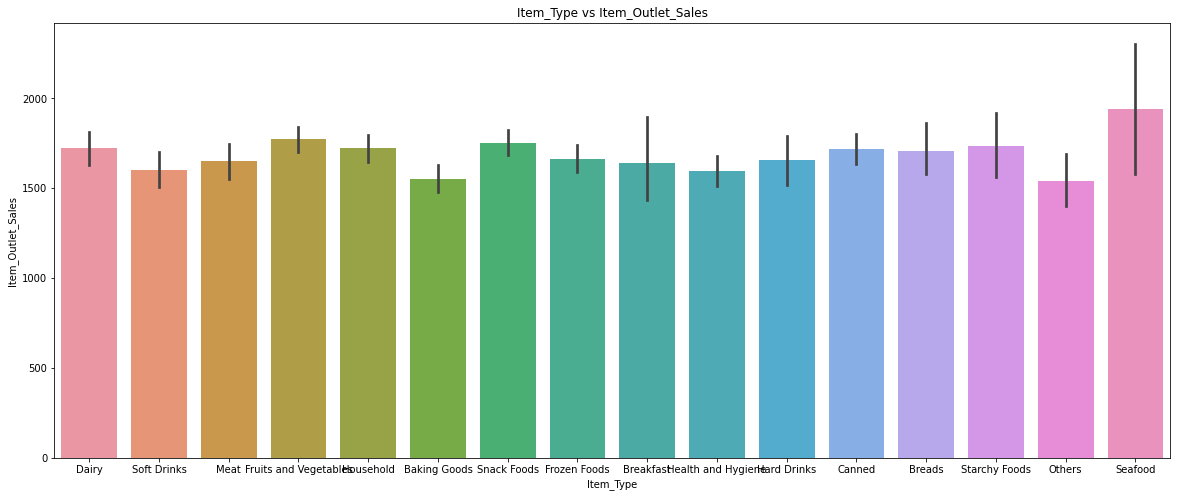

In [106]:
# ITEM_TYPE vs Sales
# Finding which item has more sales

plt.figure(figsize = (20, 8))
sns.barplot(x = 'Item_Type', y = 'Item_Outlet_Sales', data = sales_data1)

plt.title("Item_Type vs Item_Outlet_Sales")
plt.show()


**From All the Items seafood has more sales**

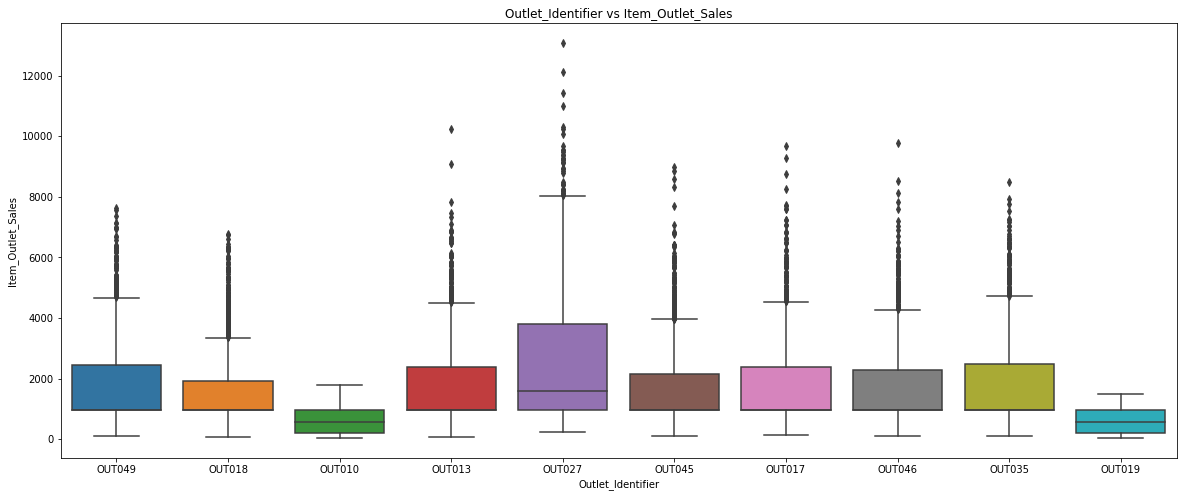

In [107]:
# Outlet_Identifier vs Sales
# Finding which outlet has more sales

plt.figure(figsize = (20, 8))
sns.boxplot(x = 'Outlet_Identifier', y = 'Item_Outlet_Sales', data = sales_data1)

plt.title("Outlet_Identifier vs Item_Outlet_Sales")
plt.show()

# Observations:
**From the visualization we can find that outlet27 has more sales.**

<Figure size 1440x576 with 0 Axes>

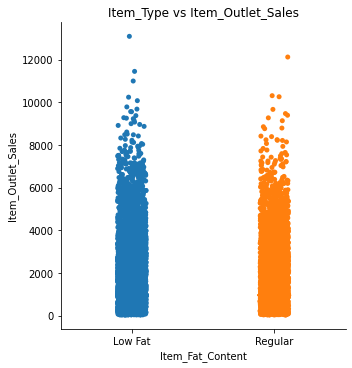

In [108]:
# ITEM_TYPE vs Sales
# Finding which item has more sales

plt.figure(figsize = (20, 8))
sns.catplot(x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', data = sales_data1)

plt.title("Item_Type vs Item_Outlet_Sales")
plt.show()

**From the visualization ITEM with LOW Fat has more sales than item with regular**

**Which features are highly correlated with target variable**




<AxesSubplot:>

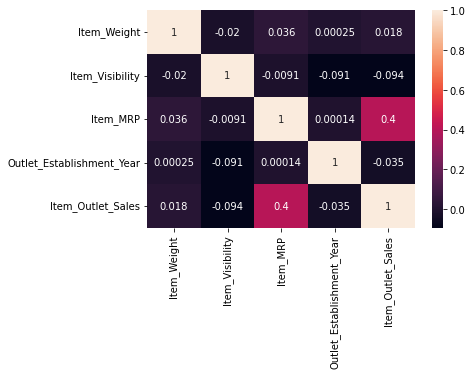

In [109]:
# plotting the correlation plot for the dataset
corr = sales_data1.corr()
sns.heatmap(corr,annot=True)

In [110]:
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.020472,0.035751,0.000247,0.018065
Item_Visibility,-0.020472,1.000000,-0.009144,-0.090833,-0.093849
Item_MRP,0.035751,-0.009144,1.000000,0.000141,0.401572
Outlet_Establishment_Year,0.000247,-0.090833,0.000141,1.000000,-0.034597
Item_Outlet_Sales,0.018065,-0.093849,0.401572,-0.034597,1.000000


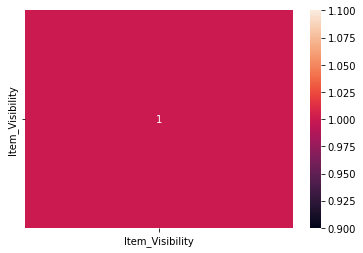

In [111]:
l1=[]
for i in corr:
   if abs(corr[i].corr(corr['Item_Outlet_Sales']))>=0.4   and (corr[i].corr(corr['Item_Outlet_Sales']) <=-0.03):
    l1.append(i)
#fig,ax=plt.subplots(figsize=(15,15))
ax=(sns.heatmap(corr[l1].corr(),annot=True))

Observations:
Highly correlated with target variable is Item_visiblity

Visualizing all the features

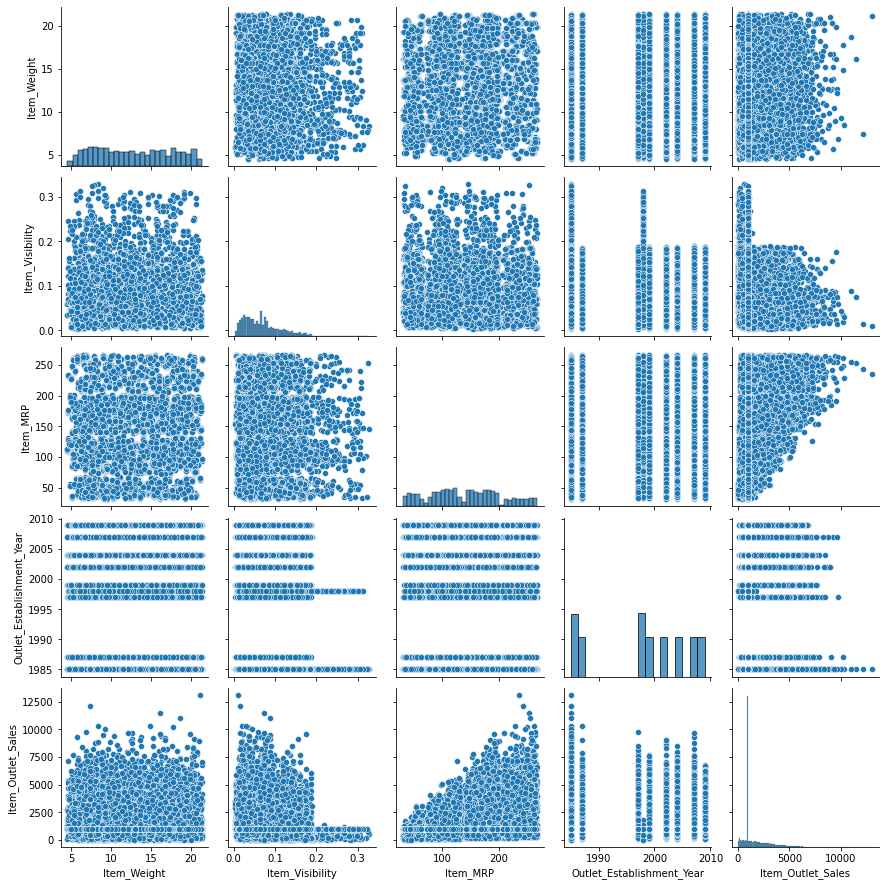

In [112]:
sns.pairplot(sales_data1)


# Observations
* From the pairplot visualization the data is scattered in most of the features like ITEM_MRP,Item_weight and all.

In [113]:
sales_data1.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [114]:
# importing label encoder
from sklearn.preprocessing import LabelEncoder

# creating a label encoder
le = LabelEncoder()


# label encoding for Item_Identifier
sales_data1['Item_Identifier'] = le.fit_transform(sales_data1['Item_Identifier'])

# label encoding for Fat_content
# 0 for lowfat and 1 for regular
sales_data1['Item_Fat_Content'] = le.fit_transform(sales_data1['Item_Fat_Content'])

# label encoding for Item_type
sales_data1['Item_Type'] = le.fit_transform(sales_data1['Item_Type'])

# label encoding for Outlet_Identifier
sales_data1['Outlet_Identifier'] = le.fit_transform(sales_data1['Outlet_Identifier'])

# label encoding for Outlet_Size
sales_data1['Outlet_Size'] = le.fit_transform(sales_data1['Outlet_Size'])

# label encoding for Outlet_Location_Type
sales_data1['Outlet_Location_Type'] = le.fit_transform(sales_data1['Outlet_Location_Type'])

# label encoding for Outlet_Type
sales_data1['Outlet_Type'] = le.fit_transform(sales_data1['Outlet_Type'])




In [115]:
sales_data1['Item_Identifier'].value_counts()

979     10
888     10
174     10
1069    10
513     10
        ..
860      7
648      7
130      7
467      7
1528     7
Name: Item_Identifier, Length: 1559, dtype: int64

# **Scaling the data**

In [143]:
sales_data2=sales_data1.drop(columns=['Item_Outlet_Sales'])

In [144]:
# As the mean values are in different range scaling the data to get them in same range
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(sales_data2)



In [145]:
sales_data3=pd.DataFrame(df_scaled)
sales_data3.columns=['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']

In [146]:
sales_data2.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.3,0,0.016047,4,249.8092,9,1999,1,0,1


In [147]:
#Selecting Independent (Features) & Dependent(Target) variables

X = sales_data1.drop(columns=['Item_Outlet_Sales'])
y = sales_data1['Item_Outlet_Sales']

#**Splitting the dataset into the Training set and Test set**

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 1)

In [149]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11363, 11)
(2841, 11)
(11363,)
(2841,)


# **Model Building**

# **Model 1:Linear Regression**

In [150]:
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score
from math import sqrt

# creating the model
lr = LinearRegression()

# feeding the training data to the model
lr.fit(X_train, y_train)

# predicting the test set results
y_pred = lr.predict(X_test)


# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(y_test, y_pred))       
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  1460251.5771264785
RMSE:  1208.4086962309061
R2 : 0.25743967047569327


In [151]:
print('coefficient of determination (R2):', R2)
print('intercept:', lr.intercept_)
print('slope:', lr.coef_)

coefficient of determination (R2): 0.25743967047569327
intercept: 5047.166439822351
slope: [-9.34198062e-03  9.04677244e-01  5.51109491e+01 -1.17766581e+03
 -2.92958277e+00  9.44754876e+00  3.40376980e+01 -2.66193923e+00
 -9.16555086e+00 -3.90524081e+01  5.07260721e+02]


# **Formula is y=b0+b1x1**
1.y is target varibale i.e.,Item outlet sales
2.b0=intercepti.e.,0.0017
3.b1=slope for all the independent variables 
4.x1,x2....xn->>>> are independent varibles

# **Model2:Decision Tree regression **

In [152]:
from sklearn.tree import DecisionTreeRegressor

# creating the model
dt = DecisionTreeRegressor(max_depth=5)

# feeding the training data to the model
dt.fit(X_train, y_train)

# predicting the test set results
y_pred = dt.predict(X_test)

# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(y_test, y_pred))       
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  1402123.3023881481
RMSE:  1184.1128756956189
R2 : 0.2869987899592775


# **Model 3:RandomForest**

In [156]:
from sklearn.ensemble import RandomForestRegressor

# creating the model
rf = RandomForestRegressor()

# feeding the training data to the model
rf.fit(X_train, y_train)

# predicting the test set results
y_pred = rf.predict(X_test)


# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(y_test, y_pred))       
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  1577789.402358224
RMSE:  1256.1008726842856
R2 : 0.197669883130279


# **Model4:ADABOOST**



In [159]:
#Define model
from sklearn.ensemble import AdaBoostRegressor


# creating the model
ad = AdaBoostRegressor(n_estimators=100)

# feeding the training data to the model
ad.fit(X_train, y_train)

# predicting the test set results
y_pred = ad.predict(X_test)


# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(y_test, y_pred))       
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  1886563.6409685758
RMSE:  1373.5223481867981
R2 : 0.040653445714535996


# **Model:5 KNN Model**





In [158]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

Minimum error:- 0.8194297782470961 at K = 1


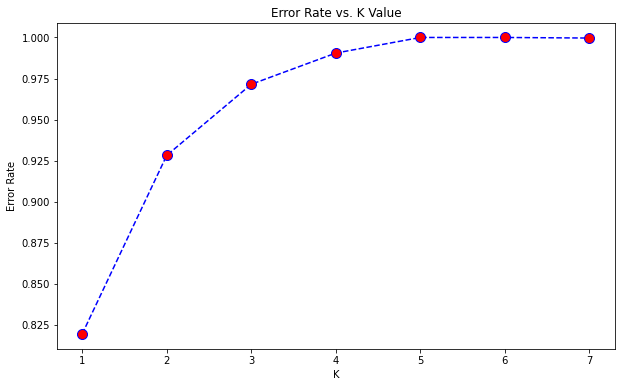

In [160]:
error_rate = []
for i in range(1,8):
 kmodel= KNeighborsRegressor(n_neighbors=i)
 kmodel.fit(X_train,y_train)
 pred_i = kmodel.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

 
plt.figure(figsize=(10,6))
plt.plot(range(1,8),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

**At k=1 minimum error is 0.84**

In [162]:
# predicting the test set results
y_pred = kmodel.predict(X_test)



# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(y_test, y_pred))       
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  1895495.2795137435
RMSE:  1376.7698716611078
R2 : 0.03611157048893765


Obtain the model for NAN values for decisiontree model

NAN values replaced with 0

In [166]:
sales_data['Item_Outlet_Sales'] = sales_data['Item_Outlet_Sales'].fillna(0)

In [167]:
# importing label encoder
from sklearn.preprocessing import LabelEncoder

# creating a label encoder
le = LabelEncoder()


# label encoding for Item_Identifier
sales_data['Item_Identifier'] = le.fit_transform(sales_data['Item_Identifier'])

# label encoding for Fat_content
# 0 for lowfat and 1 for regular
sales_data['Item_Fat_Content'] = le.fit_transform(sales_data['Item_Fat_Content'])

# label encoding for Item_type
sales_data['Item_Type'] = le.fit_transform(sales_data['Item_Type'])

# label encoding for Outlet_Identifier
sales_data['Outlet_Identifier'] = le.fit_transform(sales_data['Outlet_Identifier'])

# label encoding for Outlet_Size
sales_data['Outlet_Size'] = le.fit_transform(sales_data['Outlet_Size'])

# label encoding for Outlet_Location_Type
sales_data['Outlet_Location_Type'] = le.fit_transform(sales_data['Outlet_Location_Type'])

# label encoding for Outlet_Type
sales_data['Outlet_Type'] = le.fit_transform(sales_data['Outlet_Type'])

In [168]:
X = sales_data.drop(columns=['Item_Outlet_Sales'])
y = sales_data['Item_Outlet_Sales']

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 1)

In [170]:



# creating the model
dc1= DecisionTreeRegressor(max_depth=5)

# feeding the training data to the model
dc1.fit(X_train, y_train)

# predicting the test set results
y_pred = dc1.predict(X_test)


# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(y_test, y_pred))       
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  2162447.4690273204
RMSE:  1470.5262558102527
R2 : 0.2086033839785626


# Interpetation:
* With Nan values in the dataset the R2 score is 0.20 and RMSE score is 1470.These values are done with out scaling the data.


# **Visulization of all the models**

In [163]:

y_predlr=lr.predict(X_test)
y_predRF=rf.predict(X_test)
y_predknn=kmodel.predict(X_test)
y_predad=ad.predict(X_test)
y_preddt=dt.predict(X_test)



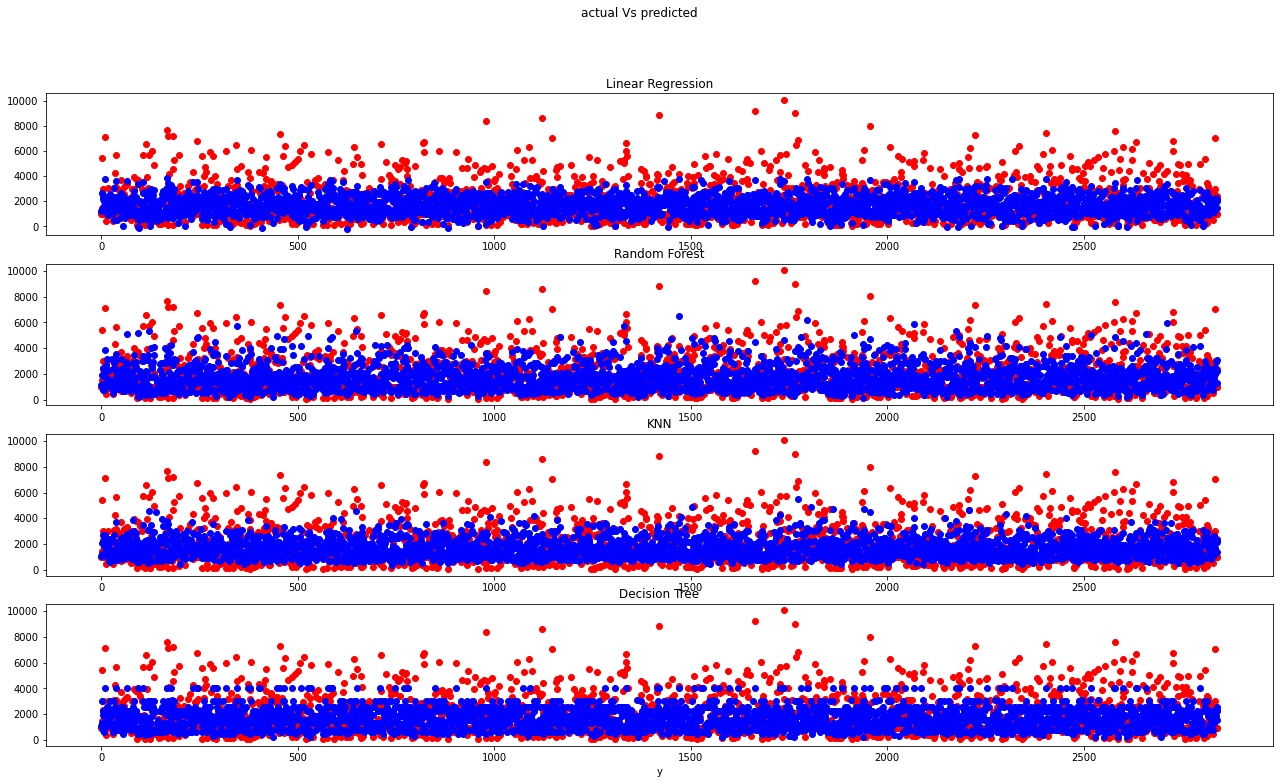

In [165]:
#plotting Actual Vs Predicted
fig,(ax1,ax2,ax3,ax4)=plt.subplots(4,figsize=(22,12))
index=list(np.arange(0,len(y_test)))
ax1.scatter(index,y_test,color='red')
ax1.scatter(index,y_predlr,color='blue')
ax1.set_title('Linear Regression')

fig.suptitle('actual Vs predicted')


x=list(np.arange(0,len(y_test)))
ax2.scatter(index,y_test,color='red')
ax2.set_title('Random Forest')
ax2.scatter(index,y_predRF,color='blue')
plt.xlabel('x')
plt.xlabel('y')


x=list(np.arange(0,len(y_test)))
ax3.scatter(index,y_test,color='red')
ax3.set_title('KNN')
ax3.scatter(index,y_predknn,color='blue')
plt.xlabel('x')
plt.xlabel('y')


x=list(np.arange(0,len(y_test)))
ax4.scatter(index,y_test,color='red')
ax4.set_title('Decision Tree')
ax4.scatter(index,y_preddt,color='blue')
plt.xlabel('x')
plt.xlabel('y')


plt.show()






From the above visualization the actual values are less scattered in ADA model,for remaining all the models they are more scattered.

# **Interpetation:**

*   From all the five models RMSE value is high in decision tree model score is  0.28  and RMSE value is around 1184.

*  It can be referred that 28% of the changeability of the dependent output attribute can be explained by the model 
* A higher value of R2 is desirable as it indicates better results.




